# Worksheet 3: Bootstrapping and its Relationship to the Sampling Distribution

### Lecture and Tutorial Learning Goals
After completing this week's lecture and tutorial work, you will be able to:
1. Explain why we don’t know/have a sampling distribution in practice/real life.
2. Define bootstrapping.
3. Write a computer script to create a bootstrap distribution to approximate a sampling distribution.
4. Contrast a bootstrap sampling distribution with a sampling distribution obtained using multiple samples.

In [1]:
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
source("tests_worksheet_03.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘infer’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks 

## 1. Warm Up Questions

**Question 1.0**
<br> {points: 1}

Below is a table that lists out various types of distributions that require sampling to generate. The right column of the table is empty but should describe the location(s) from which one **must** sample (at some point) to produce the corresponding distribution. Fill in the blanks of the table by assigning the object name with the letter associated with the phrase that is the most appropriate for that cell. The options are listed below the table.

| Distribution                    | Requires sampling from? |
| ------------------------------- | ----------------------- |
| Sampling distribution           | `answer1.0.0`           |
| Bootstrap sample distribution   | `answer1.0.1`           |
| Bootstrap sampling distribution | `answer1.0.2`           |
| Sample distribution             | `answer1.0.3`           |

A. The population.

B. A sample from the population.

C. Both A & B.

_Assign your answers to the objects  `answer1.0.0`, `answer1.0.1`, `answer1.0.2`, and `answer1.0.3`. Your answer should each be a single character surrounded by quotes._

In [2]:
answer1.0.0 <- "A"
answer1.0.1 <- "C"
answer1.0.2 <- "C"
answer1.0.3 <- "A"

# your code here


In [3]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br> {points: 1}

You are tasked with finding the proportion of UBC undergraduate students who own one or more pairs of Blundstone boots. You only have the time and resources to take a single sample of around 45 students.

True or false?

Given the scenario above, it would be possible to generate a bootstrap sampling distribution of point estimates for the population parameter of interest.

_Assign your answer to an object called `answer1.1`. Your answer should be either "true" or "false", surrounded by quotes._

In [4]:
# answer1.1 <- ...

# your code here
answer1.1 <- "true"

In [5]:
test_1.1()

[1] "Success!"


**Question 1.2**
<br> {points: 1}

True or false?

In reality, we most often have the ability to directly compute the population parameter that we are interested in.

_Assign your answer to an object called `answer1.2`. Your answer should be either "true" or "false" surrounded by quotes._

In [6]:
# answer1.2 <- ...

# your code here
answer1.2 <- "false"

In [7]:
test_1.2()

[1] "Success!"


## 2. We Need More Samples (An Introduction to Bootstrapping)

If you recall from the last tutorial, you were given a hypothetical scenario where you did not have access to data for the population of interest. Instead, you had two different samples from the population, and we got stuck when we wanted to study the variation (or, more formally, the standard error) of our point estimates (also called the *sampling variation*). The reasoning behind this was because we need many point estimates to study sampling variation, but we only had one of each size... So how do we study sampling variation without taking more samples from the population to produce a sampling distribution?

<br>

![](https://i1.wp.com/www.r-bloggers.com/wp-content/uploads/2010/06/boot.jpg?resize=210%2C294&ssl=1)
<div style="text-align: center"><i>Image from <a href="https://www.r-bloggers.com/bootstrapping-the-latest-r-into-amazon-elastic-map-reduce/" width="100">R-bloggers</i></a></div><br>

The solution to this is **bootstrapping** (or specifically, **bootstrap resampling with replacement**). The term bootstrapping originates from the phrase "to pull oneself up by one's bootstraps", which refers to completing a seemingly impossible task with no external help. In Statistics, Bootstrapping is the idea of sampling from our original sample **with replacement** (also called **resampling with replacement**) to generate a **bootstrap sampling distribution**. Sampling with replacement means that each time we choose an observation from the population or sample, we return it before randomly selecting another. With this procedure, the original sample acts as an *estimate* of the population, and resampling with replacement gives us enough samples and results in enough *sampling variation* necessary to produce an approximation of the sampling distributions we have generated in the previous weeks. In this sense, our single sample has acted as our "bootstrap", and we have used it to "pull ourselves up" and create an approximation of the desired sampling distribution.

**Question 2.0**
<br> {points: 1}

Suppose you had a single sample of size 20 held in the data frame `sample` and you wanted to study the variation of a point estimate from samples of this size. This means we need many more samples of size 20 to generate a sampling distribution. **Which of the following statements is true about the approach below?**

```r
more_samples <- sample %>% 
    rep_sample_n(size = 20, reps = 1400, replace = FALSE)
```

A. This approach would enable us to approximate the sampling distribution so we can study sampling variation.

B. This approach would not give us enough samples (we need to increase the `reps` argument).

C. This approach would give us 1400 identical samples.

D. This approach is known as sampling with replacement.

E. Both A & D.

F. None of the above.

_Assign your answer to an object called `answer2.0`. Your answer should be a single character surrounded by quotes._

In [8]:
# answer2.0 <- ...

# your code here
answer2.0<- "C"

In [9]:
test_2.0()

[1] "Success!"


Use the following scenario to answer the **next two questions**:

Suppose you had a small bowl of 9 Canadian dimes with the following production years (listed in increasing order):

```
1994, 1995, 1997, 1999, 2000, 2000, 2001, 2001, 2012
```

**Question 2.1**
<br> {points: 1}

Assume we sampled 9 dimes out of the bowl, one at a time, in the order below. However, you do not know whether we returned the dime that we chose before taking another (sampling with replacement) or not (sampling without replacement).

```
1997, 1999, 1994, 2001, 1994, 2012, 2001, 2012, 2000
```

Given the sample above, was it a result of sampling **with replacement** or **without replacement**?

A. The sample is a result of sampling with replacement.

B. The sample is a result of sampling without replacement.

C. There is not enough information to answer the question.

_Assign your answer to an object called `answer2.1`. Your answer should be a single character surrounded by quotes._

In [10]:
# answer2.1 <- ...

# your code here
answer2.1<- "A"

In [11]:
test_2.1()

[1] "Success!"


**Question 2.2**
<br> {points: 1}

Assume we sampled 9 dimes out of the bowl, one at a time, in the order below. However, you do not know whether we returned the dime that we chose before taking another (sampling with replacement) or not (sampling without replacement).

```
2012, 1994, 2001, 1999, 1997, 2001, 2000, 2000, 1995
```

Given the sample above, was it a result of sampling **with replacement** or **without replacement**?

A. The sample is a result of sampling with replacement.

B. The sample is a result of sampling without replacement.

C. There is not enough information to answer the question.

_Assign your answer to an object called `answer2.2`. Your answer should be a single character surrounded by quotes._

In [12]:
# answer2.2 <- ...

# your code here
answer2.2 <-"C"

In [13]:
test_2.2()

[1] "Success!"


**Question 2.3**
<br> {points: 1}

True or false?

When you take a bootstrap sample, you are sampling with replacement from the population.

_Assign your answer to an object called `answer2.3`. Your answer should be either "true" or "false", surrounded by quotes._

In [14]:
# answer2.3 <- ...

# your code here
answer2.3 <- "false"

In [15]:
test_2.3()

[1] "Success!"


## 3. Sample Distribution vs. Bootstrap Sample Distribution(s)

Before we jump into creating bootstrap sampling distributions, let's take a moment to gain some more insight into how sampling with replacement introduces **sampling variation**. Consider the population of all current UBC students, and suppose we were interested in the mean number of **full** years that they have been studying at UBC. Assume we had the following sample of size 35 from the population named `ubc_sample`:

In [16]:
# Run this cell before continuing.
source("section_3.R") # Runs code to produce the sample.
head(ubc_sample)
nrow(ubc_sample)

full_years
<dbl>
0
1
4
0
4
5


[1] 35

**Question 3.0**
<br> {points: 1}

Take a single bootstrap sample from `ubc_sample` using `rep_sample_n` with a seed of 0242. The resulting data frame should have two columns: `replicate` and `full_years`.

_Assign your data frame to an object called `bootstrap_sample`._

In [17]:
set.seed(0242) # DO NOT CHANGE!

# bootstrap_sample <- ... %>% 
#     rep_sample_n(size = ..., replace = ...)

# your code here
bootstrap_sample <- ubc_sample %>%
    rep_sample_n(size=35, replace=TRUE)

head(bootstrap_sample)

replicate,full_years
<int>,<dbl>
1,4
1,3
1,4
1,3
1,0
1,4


In [18]:
test_3.0()

[1] "Success!"


**Question 3.1** 
<br> {points: 1}

Calculate the mean of the sample (`ubc_sample`).

_Assign your answer to an object called `ubc_sample_mean`. Your answer should be a single number._

In [19]:
# your code here
ubc_sample_mean <- mean(ubc_sample$full_years)

ubc_sample_mean

[1] 2.371429

In [20]:
test_3.1()

[1] "Success!"


**Question 3.2** 
<br> {points: 1}

Calculate the mean of the bootstrap sample that you took in **question 3.0** (`bootstrap_sample`).

_Assign your answer to an object called `bootstrap_sample_mean`. Your answer should be a single number._

In [23]:
# your code here
bootstrap_sample_mean <- mean(bootstrap_sample$full_years)


bootstrap_sample_mean

[1] 2.142857

In [24]:
test_3.2()

[1] "Success!"


**Question 3.3**
<br> {points: 1}

True or false?

The mean of the bootstrap sample is different than the original sample because we sampled **with replacement** from the original sample.

_Assign your answer to an object called `answer3.3`. Your answer should be either "true" or "false", surrounded by quotes._

In [25]:
# answer3.3 <- ...

# your code here
answer3.3 <-"true"

In [26]:
test_3.3()

[1] "Success!"


**Question 3.4**
<br> {points: 1}

Plot the bootstrap sample you just took by filling in the scaffolding below to create a histogram with bin widths of 1.

**Notes:**
- The `colour = "white"` argument in `geom_histogram` adds outlines to the histogram bars.
- The `scale_x_continuous` layer modifies the x-axis scale to make it more readable.

_Assign your plot to an object called `bootstrap_sample_dist`._

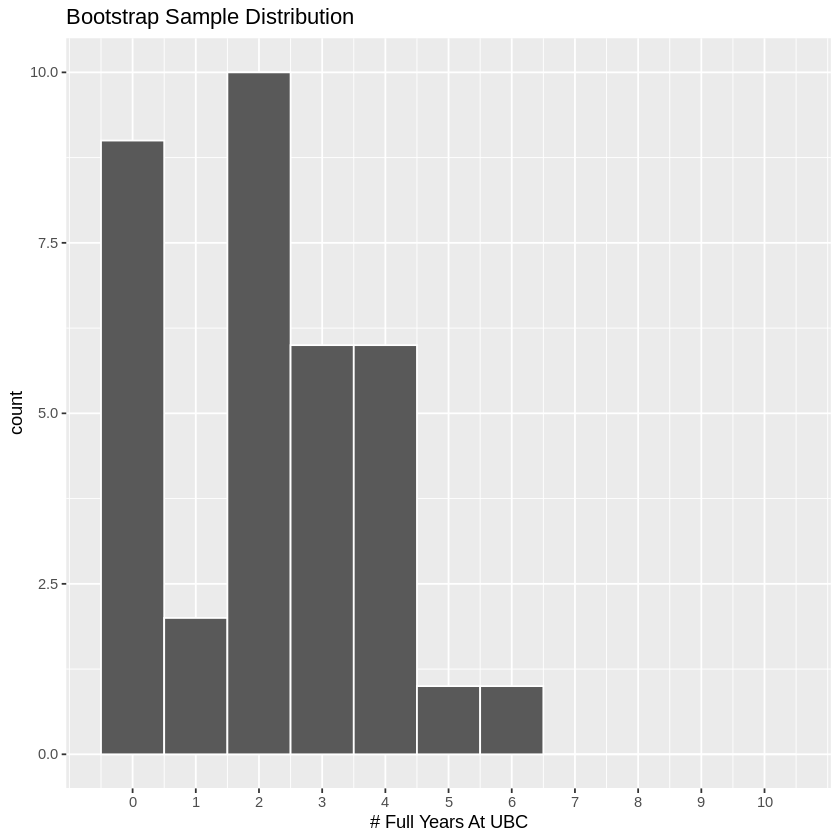

In [27]:
# bootstrap_sample_dist <- ... %>% 
#     ...(aes(x = ...)) + 
#         geom_histogram(binwidth = ..., colour = "white") +
#         ...("Bootstrap Sample Distribution") +
#         xlab("# Full Years At UBC") + 
#         scale_x_continuous(breaks = seq(0, 10, 1), limits = c(-0.5, 10.5)) 

# your code here
bootstrap_sample_dist <- bootstrap_sample %>% 
     ggplot(aes(x = full_years)) + 
         geom_histogram(binwidth = 1, colour = "white") +
         ggtitle("Bootstrap Sample Distribution") +
         xlab("# Full Years At UBC") + 
         scale_x_continuous(breaks = seq(0, 10, 1), limits = c(-0.5, 10.5)) 


bootstrap_sample_dist

In [28]:
test_3.4()

[1] "Success!"


In the code cell below, we have used `plot_grid` to plot the sample distribution and bootstrap distribution together.

_Use the set of plots below to answer the **next question**._

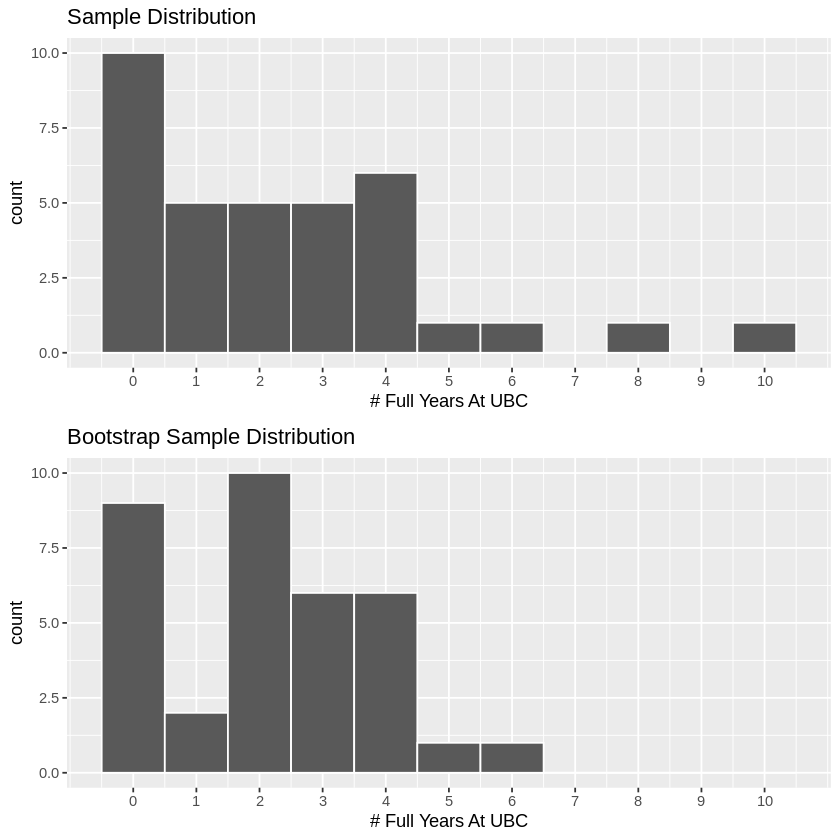

In [29]:
plot_grid(sample_dist, bootstrap_sample_dist, ncol = 1)

**Question 3.5**
<br> {points: 1}

Suppose we repeated the process above, but using a different seed when we took our bootstrap sample (`bootstrap_sample`) from the original sample (`ubc_sample`).

True or false?

We are guaranteed that the two distributions above will be different.

_Assign your answer to an object called `answer3.5`. Your answer should be either "true" or "false", surrounded by quotes._

In [30]:
# answer3.5 <- ...

# your code here
answer3.5<- "false"

In [31]:
test_3.5()

[1] "Success!"


## 4. Sampling Distributions vs. Bootstrap Sampling Distributions

Now that we understand that we can use **bootstrapping** to produce an **approximation** of a sampling distribution, we are going to use it to approximate the sampling distributions that we produced in `worksheet_02` and compare the two. You will produce a bootstrap sample distribution of size 10, 30, and 100 for the tax assessment values in the population of **multiple-family dwellings in strata housing** in Vancouver, we will give you their corresponding sampling distributions, and then you'll be able to compare the two types of distributions for each sample size. Let's get started!

Recall our population of interest (**multiple-family dwellings in strata housing** in Vancouver) originates from the `tax_2019` data set included in the `taxyvr` R package. Again, since you have already done this is `worksheet_01`, we have done it for you in the code cell below. To filter the `tax_2019` data set for the population that we are interested in, we need the `current_land_value` of properties that meet the following critera:
- **Have a `current_land_value` greater than \$1:**  Some properties are assigned a value of `NA` and these are the properties undergoing big renovations. These values get ammended after the improvement and are reflected in the following year's assessment. The same occurs with homes that are asssessed at $0.
- **Are of `legal_type` `"STRATA"`**
- **Are of `zone_category` `"Multiple Family Dwelling"`**

_If you need a refresher on the `tax_2019` data set and where it came from, please look back at `worksheet_01` and re-read the introduction of section 2 there._

In [32]:
# Run this cell before continuing.
multi_family_strata <- tax_2019 %>%  
    filter(!is.na(current_land_value),
           current_land_value > 1,
           legal_type == "STRATA",
           zone_category == "Multiple Family Dwelling") %>% 
    select(current_land_value)
head(multi_family_strata)

current_land_value
<dbl>
1052000
984000
984000
1067000
500000
982000


**Question 4.0** 
<br> {points: 1}

Imagine you only have the resources to take a single random sample of size 10 from the population of interest. Use `rep_sample_n` with a seed of 2485 to take a single sample of size 10 from `multi_family_strata`. Select only the `current_land_value` column so your data frame has a single column.

**Note:** we use `ungroup()` here because `rep_sample_n` returns a data frame that is grouped by `replicate`, but we want an ungrouped data frame so we can select `current_land_value` by itself! If you are curious, try commenting out the `ungroup() %>%` line to see why.

_Assign your data frame to an object called `sample_10`._

In [33]:
set.seed(2485) # DO NOT CHANGE!

# sample_10 <- multi_family_strata %>% 
#     rep_sample_n(size = ..., replace = ...) %>%
#     ungroup() %>% 
#     ...(...)

# your code here
sample_10 <- multi_family_strata %>% 
     rep_sample_n(size = 10, replace = TRUE) %>%
     ungroup() %>% 
     select(current_land_value)


sample_10

current_land_value
<dbl>
499000
331000
294000
559000
948000
1208000
648000
486000
689000


In [34]:
test_4.0()

[1] "Success!"


**Question 4.1** 
<br> {points: 1}

Take 2000 bootstrap samples from the sample you just took (`sample_10`) using `rep_sample_n` and a seed of 0510. Then, calculate the mean for each bootstrap sample and name the resulting column `mean_land_value`. The resulting data frame should have two columns: `replicate` and `mean_land_value`.

_Assign your data frame to an object called `resampled_means_10`._

In [35]:
set.seed(0510) # DO NOT CHANGE!

# resampled_means_10 <- sample_10 %>% 
#     rep_sample_n(size = ..., reps = ..., replace = ...) %>% 
#     group_by(...) %>% 
#     summarise(mean_land_value = ...(...))

# your code here
resampled_means_10 <- sample_10 %>% 
     rep_sample_n(size = 10, reps = 2000, replace = TRUE) %>% 
     group_by(replicate) %>% 
     summarise(mean_land_value = mean(current_land_value))

head(resampled_means_10)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,mean_land_value
<int>,<dbl>
1,684500
2,867100
3,558700
4,725500
5,669600
6,951700


In [36]:
test_4.1()

[1] "Success!"


**Question 4.2** 
<br> {points: 1}

Visualize the distribution of the sample means (the `mean_land_value` variable in `resampled_means_10`) by plotting a histogram using `geom_histogram` with the argument `binwidth = 15000`. Add a title of "n = 10" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `bootstrap_dist_10`._

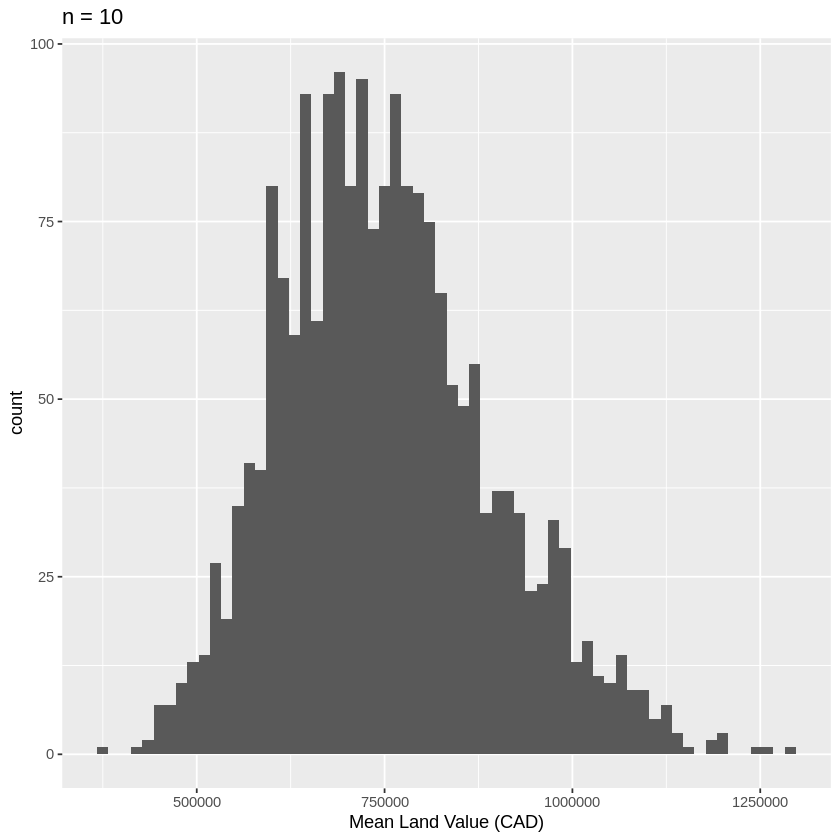

In [37]:
# bootstrap_dist_10 <- ... %>% 
#     ggplot(aes(x = ...)) +
#     ...(... = ...) +
#     xlab("Mean Land Value (CAD)") +
#     ...("n = 10")

# your code here
bootstrap_dist_10 <- resampled_means_10 %>% 
    ggplot(aes(x = mean_land_value)) +
    geom_histogram(binwidth=15000) +
    xlab("Mean Land Value (CAD)") +
    ggtitle("n = 10")

bootstrap_dist_10

In [38]:
test_4.2()

[1] "Success!"


**Question 4.3** 
<br> {points: 1}

True or false?

In order to produce the distribution above, we had to sample with replacement from the population many times.

_Assign your answer to an object called `answer4.3`. Your answer should be either "true" or "false", surrounded by quotes._

In [39]:
# answer4.3 <- ...

# your code here
answer4.3 <- "false"

In [40]:
test_4.3()

[1] "Success!"


**Question 4.4** 
<br> {points: 1}

Imagine you only have the resources to take a single random sample of size 30 from the population of interest. Use `rep_sample_n` with a seed of 0494 to take a single sample of size 30 from `multi_family_strata`. Select only the `current_land_value` column so your data frame has a single column.

_Assign your data frame to an object called `sample_30`._

In [41]:
set.seed(8183) # DO NOT CHANGE!

# sample_30 <- multi_family_strata %>% 
#     rep_sample_n(size = ..., replace = ...) %>%
#     ungroup() %>% 
#     ...(...)

# your code here
sample_30 <- multi_family_strata %>% 
     rep_sample_n(size = 30, replace = TRUE) %>%
     ungroup() %>% 
     select(current_land_value)


head(sample_30)

current_land_value
<dbl>
1339000
275000
879000
419000
480000
1300000


In [42]:
test_4.4()

[1] "Success!"


**Question 4.5** 
<br> {points: 1}

Using the same strategy as you did above, take 2000 bootstrap samples from the sample you just took (`sample_30`), but this time use the seed 7032. Then, calculate the mean for each sample (name the new column `mean_land_value`). Lastly, visualize the distribution of the sample means you just calculated by plotting a histogram using `geom_histogram` with the argument `binwidth = 15000`. Add a title of "n = 30" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `bootstrap_dist_30`._

`summarise()` ungrouping output (override with `.groups` argument)



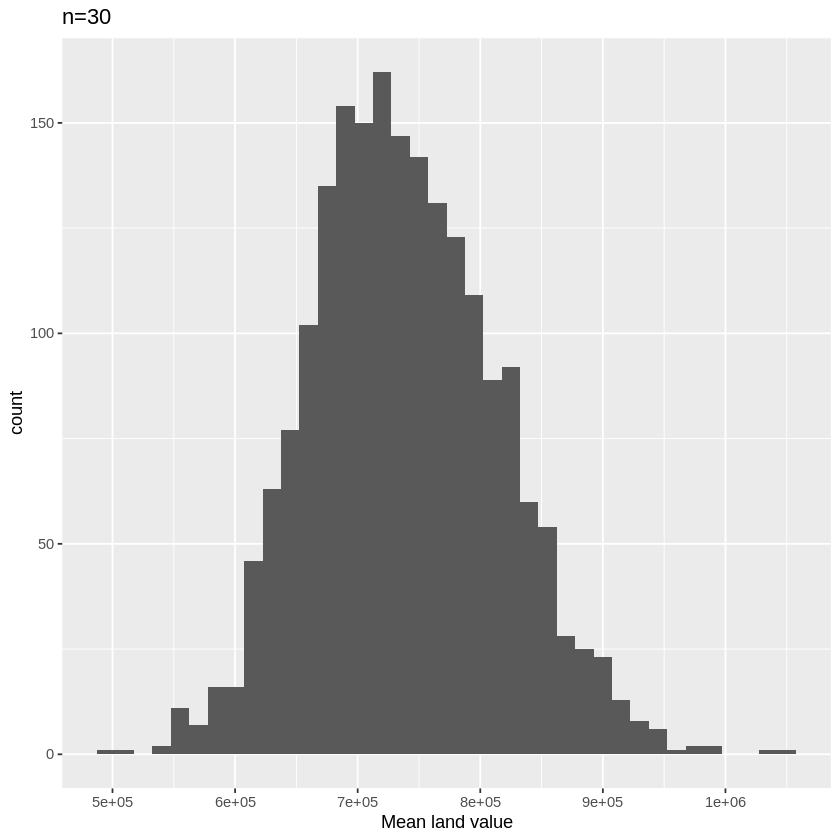

In [43]:
set.seed(7032) # DO NOT CHANGE!

# your code here
bootstrap_dist_30 <- 
    sample_30 %>%
    rep_sample_n(size=30, reps= 2000, replace=TRUE) %>%
    group_by(replicate) %>%
    summarize(mean_land_value = mean(current_land_value)) %>%
    ggplot(aes(x=mean_land_value)) +
    geom_histogram(binwidth=15000) +
    ggtitle("n=30") +
    xlab("Mean land value")
bootstrap_dist_30

In [44]:
test_4.5()

[1] "Success!"


**Question 4.6** 
<br> {points: 1}

Imagine you only have the resources to take a single random sample of size 100 from the population of interest. Use `rep_sample_n` with a seed of 5029 to take a single sample of size 100 from `multi_family_strata`. Select only the `current_land_value` column so your data frame has a single column.

_Assign your data frame to an object called `sample_100`._

In [45]:
set.seed(5029) # DO NOT CHANGE!

# sample_100 <- multi_family_strata %>% 
#     rep_sample_n(size = ..., replace = ...) %>%
#     ungroup() %>% 
#     ...(...)

# your code here
sample_100 <- multi_family_strata %>% 
     rep_sample_n(size = 100, replace = TRUE) %>%
     ungroup() %>% 
     select(current_land_value)

head(sample_100)

current_land_value
<dbl>
785000
456000
1182000
1338000
454000
1081000


In [46]:
test_4.6()

[1] "Success!"


**Question 4.7** 
<br> {points: 1}

Using the same strategy as you did above, take 2000 bootstrap samples from the sample you just took (`sample_100`), but this time use the seed 2334. Then, calculate the mean for each sample (name the new column `mean_land_value`). Lastly, visualize the distribution of the sample means you just calculated by plotting a histogram using `geom_histogram` with the argument `binwidth = 15000`. Add a title of "n = 100" to the plot using `ggtitle` and ensure that the x-axis has a human-readable label.

_Assign your plot to an object called `bootstrap_dist_100`._

`summarise()` ungrouping output (override with `.groups` argument)



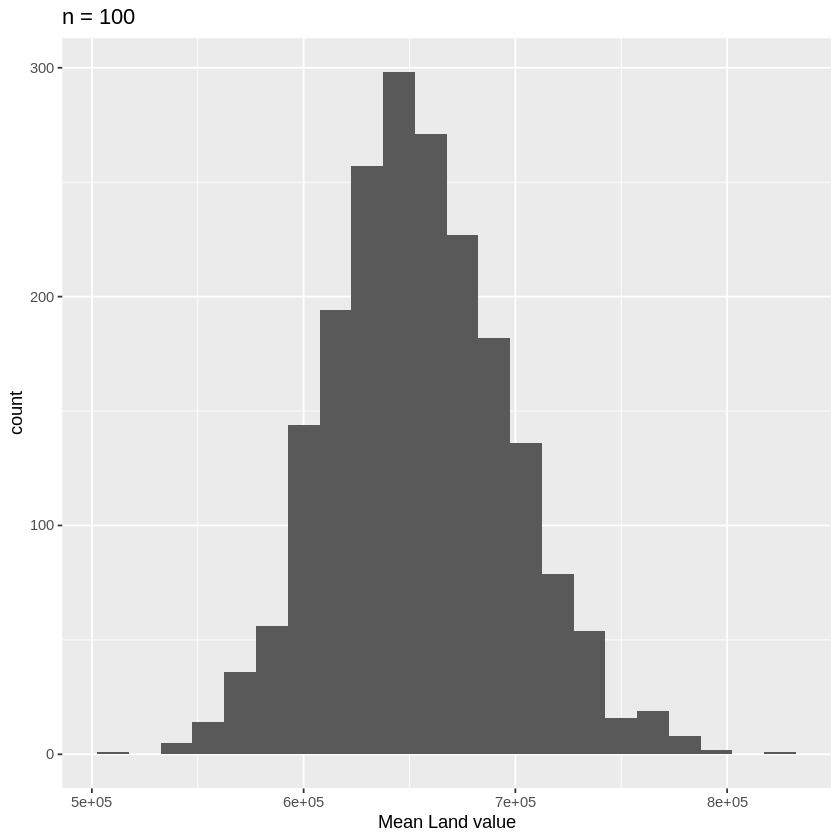

In [47]:
set.seed(2334) # DO NOT CHANGE!

# your code here
bootstrap_dist_100 <- 
        sample_100 %>%
        rep_sample_n(size=100, reps=2000, replace=TRUE) %>%
        group_by(replicate)%>%
        summarize(mean_land_value= mean(current_land_value)) %>%
        ggplot(aes(x=mean_land_value))+
        geom_histogram(binwidth= 15000)+
        ggtitle("n = 100")+
        xlab("Mean Land value")
bootstrap_dist_100

In [48]:
test_4.7()

[1] "Success!"


In the code cell below, we have run code that generates the same sampling distributions you produced in `worksheet_02`, and displays them in a row **below** the three bootstrap distributions that you produced. We have sorted the plots by increasing order of sample size from left to right. The red vertical line shows the location of the mean for each plot.

**Note**: a very small number of the sample means are not visible because we manually set bounds on the x-axis so you can compare the distributions more easily. Also, the code is inside a different file (which we ran from within this worksheet with `source`) to save some vertical space in the worksheet.

_Use the set of plots below to answer the **next two questions**._

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



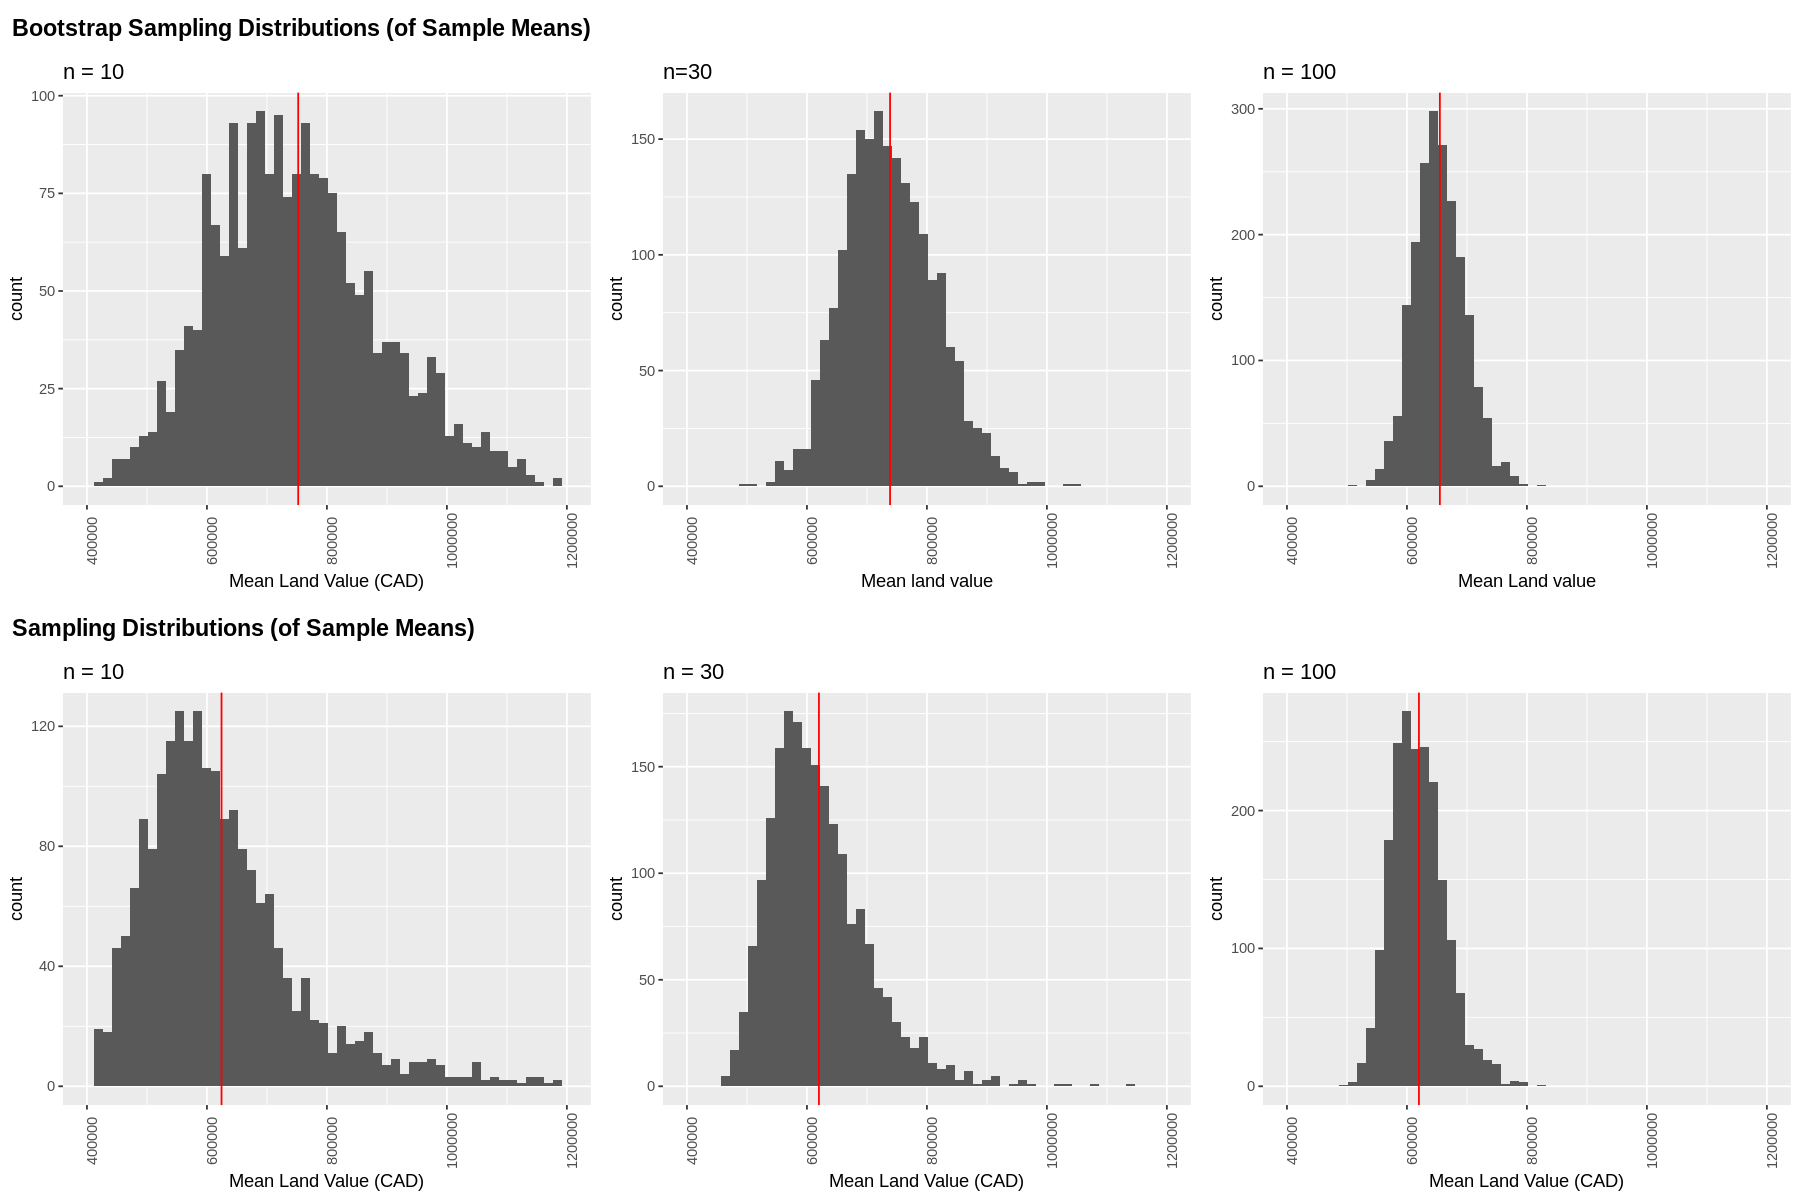

In [89]:
# Run this cell before continuing.
options(repr.plot.width = 15, repr.plot.height = 10)
source("section_4.R") # Runs code to produce the sampling distributions & arrange in grid.
all_dist_grid

**Question 4.8**
<br> {points: 1}

Considering the set of plots above, which statement below **is not** correct:

A. The centre of the sampling distribution and bootstrap distributions with the same sample size are different.

B. The width of the sampling distribution and bootstrap distributions with the same sample size are different.

C. For both the sampling distributions and bootstrap distributions, as the sample size increase, the standard deviation decreases.

D. For both the sampling distributions and bootstrap distributions, as the sample size increase, the distributions appear more bell-shaped.

E. The sampling distribution and bootstrap distribution are just as different from each other, no matter the sample size.

_Assign your answer to an object called `answer4.8`. Your answer should be a single character surrounded by quotes._

In [98]:
# answer4.8 <- ...

# your code here
answer4.8 <- "E"

In [99]:
test_4.8()

[1] "Success!"


**Question 4.9**
<br> {points: 1}

True or false?

When we only have access to a single sample from the population of interest, we can obtain a useful approximation of standard error (specifically, the standard deviation of the distribution of an estimator, or more generally, how much we expect our point estimates to vary) by producing a bootstrap distribution.

_Assign your answer to an object called `answer4.9`. Your answer should be either "true" or "false", surrounded by quotes._

In [100]:
# answer4.9 <- ...

# your code here
answer4.9 <- "true"

In [101]:
test_4.9()

[1] "Success!"
